# Simple Linear Regression

## Background
A simple linear regression is a tool to evaluate the relationship between two variables. We use it to see if changes in one variable (the explanatory variable) correlate with changes in the other variable (the target variable). For instance, you may want to create a model to show the relationship between fathers' heights and their sons' heights. Simple linear regression allows us to find that relationship by comparing the two data sets and plotting the line that most closely represents the data to a graph. In this case, we could use the line to predict a son's height given the father's height.

## Steps to perform simple linear regression in Python
This tutorial will walk you through the steps to perform a simple linear regression in Python. The code to perform the regression is broken up in several small chunks throughout the tutorial, each with a brief description of its purpose. You can run the code directly on this page by pressing the 'Play' icon on the left of each chunk. Make sure to run the code in order.

### Step 1: Set up Python

We will use the Python programming language to perform the linear regression. First, we need to install the following built-in packages to assist us.

1.   Pandas: Pandas will allow us to import and manipulate data.
2.   Seaborn: Seaborn helps us visualize our data. 
3.   StatsModels: We will use StatsModels to build the regression model.

Run the code below by hovering your mouse over the square brackets in the top left corner of the code's cell and clicking on the button that appears, as this image shows:
![alt text](https://tweeterphotos.s3-us-west-2.amazonaws.com/Screenshot+(43).png)

Clicking this button will create variables that can be accessed by code in any of the other cells. So, after we import these packages, all other cells will be able to use "pandas", "seaborn", and "statsmodels.api".


In [0]:
# Run this code by clicking on it and then the 'Play' icon to the left
import pandas as pd 
import seaborn as sns
import statsmodels.api as sm

### Step 2: Set up the data

We must define the data we will analyze. To keep it simple, we will only extract a small portion of a much larger dataset.

Our data comes from a revolutionary observational study: Galton's analysis of peas which compared parent peas to their offspring. He collected the diameters of parents and their offspring and discovered a relationship between them. He used this to make predictions of offspring sizes based on their parents. 

Run the code below to create the two sets of data. Our variables are **'parent'** and **'offspring'**, and they store the sizes of parent peas and their respective offspring.

In [0]:
# Run this code by clicking on it and then the 'Play' icon to the left
parent = [.21, .20, .19, .18, .17, .16, .15, .14]
offspring = [.1726, .1707, .1637, .1640, .1613, .1617, .1598, .1594]

### Step 3: Combine the data

We need to join the lists into a single table so they can be analyzed together. We call this table a dataframe.

First, run the code below to **zip** the two lists into a single variable called **zipped_data**.



In [0]:
# Run this code by clicking on it and then the 'Play' icon to the left
zipped_data = zip(parent, offspring)

Then, we use the pandas package (**pd** for short) to create the **dataframe** and store it in a variable called **peas**. Run this code below.

In [0]:
# Run this code by clicking on it and then the 'Play' icon to the left
peas = pd.DataFrame(zipped_data)

Run this code to name the columns of the dataframe table as **'parent'** and **'offspring'**.

In [0]:
# Run this code by clicking on it and then the 'Play' icon to the left
peas.columns = ['parent', 'offspring']

### Step 4: Create the model

Remember, we are trying to create a model that closely resembles the actual data. Our model will be the straight line with the smallest vertical distance between itself and all the data points. It is the line that best fits the data. To find it, we use the least squares method.

<center><img src="https://www.ehdp.com/vn/ro/images/800px-Residuals_for_Linear_Regression_Fit.png" width="400"></center>
<center><b>Image source: (n.d.). Retrieved from https://www.ehdp.com/methods/least-squares-regression-1.htm.</b></center>


This is an example of a regression line computed with the least squares method. The line that runs through the data points is the optimal line that minimizes the overall distance of the data points from the line.





This is the most important step in the process. Instead of calculating the least squares by hand, we will use the 'statsmodels' package (**sm**) 
and call its 'Ordinary Least Squares' method (**OLS**) to do it for us.

**Understanding the syntax:** We will use the dataframe **peas** that we built. We then use the brackets "[ ]" to access the columns within that particular dataframe, using quotation marks.

**NOTE:** Since we were given the two separate lists with the data, doing this step isn't exactly necessary; we could just plug in the list variables directly. However, we generally are not given data in lists, but in dataframes with columns so it is better practice to use this syntax.

Run the code below to compute the least squares of the two dataframe columns.

In [0]:
# Run this code by clicking on it and then the 'Play' icon to the left
ols = sm.OLS(peas['offspring'], peas['parent'])

Now, we can run the code below **fit** the least squares data, **ols**, to a regression line and store it in a variable called **model**.

In [0]:
# Run this code by clicking on it and then the 'Play' icon to the left
model = ols.fit()

### Step 5: Determine the statistical significance

Now that we have our **model**, we can look at its **summary** to see if the results are significant. 

Run the code below. Don't worry if it gives you any warnings. The most important part of the results is the p-value, which represents a probability. Specifically, it is the probability that the results we obtained occured by chance. In general, we use a significance level of 0.05. If the **p-value** is less than that, we can conclude that the results are statistically significant, and that the results **did not** occur by chance.



In [0]:
# Run this code by clicking on it and then the 'Play' icon to the left
model.summary()

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              offspring   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              631.3
Date:                Thu, 21 Nov 2019   Prob (F-statistic):                    4.04e-08
Time:                        02:04:01   Log-Likelihood:                          21.153
No. Observations:                   8   AIC:                                     -40.31
Df Residuals:                       7   BIC:                                     -40.23
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
parent         0.9253      0.037     25.126      0.000       0.838       1.012
==============================================================================
Omnibus:                        0.900   Durbin-Watson:                   0.177
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.589
Skew:                           0.199   Prob(JB):                        0.745
Kurtosis:                       1.732   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In this example, we observe a p-value that is 0.000. Since this value is less than 0.05, we can conclude that the results are not by chance; there is a relationship between the parent and the offspring diameter sizes.

### Step 6: Identify the type of relationship

Now, let's visualize our data on a graph.

Run the code below which uses the Seaborn package (**sns** for short) to plot (**regplot**) the data on a graph. We give it our dataframe (**peas**) as the data, and set the explanatory variable (**'parent'**) as the **x**-axis and the target variable (**'offspring'**) as the **y**-axis.

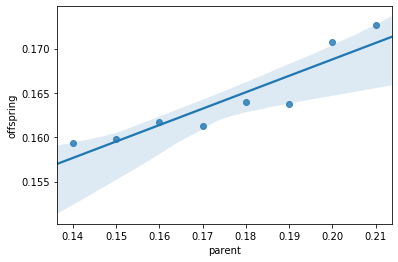

In [0]:
# Run this code by clicking on it and then the 'Play' icon to the left
sns.regplot(data=peas, x = 'parent', y = 'offspring')

The dots represent the data points. The line going through them is the regression line, or the "least squares" line. The shaded area represents a 95% confidence interval. This means that we are 95% confident that the values will be within this area.

What type of relationship exists between the data? It is positive, negative, or neither?

  - **Positive:** as one variable increases, the other variables increases as well.
  - **Negative:** as one variable increases, the other variable decreases.
  - **Neither:** There is no relationship between the variables.

### Step 7: Make predictions

We can now use the **model** to **predict** values for the target variable given the explanatory variable.

Run the code below to predict the size of an of an offspring pea who's parent has a size of **.24**.

In [0]:
# Run this code by clicking on it and then the 'Play' icon to the left
model.predict(.24)

array([0.22207512])

# Now it's your turn
Given a new data set, write the code to perform another simple linear regression. You may have to reference the first example to get it right. If you already ran through the first example, you will not need to import the Python packages again. Remember to run the code in order, or it will not work.

We will get you started by defining the lists of data: **temps** and **chirps**. This data comes from an experiment measuring how the outside temperature can affect the number of cricket chirps. The values in the two lists represent how many average chirps per minute were heard when it was a respective temperature outside. This time, temps is the explanatory variable, and chirps is the target variable.

Run the code below to define your data sets.

In [0]:
# Run this code by clicking on it and then the 'Play' icon to the left
temps = [88.6, 71.6, 93.3, 84.3, 80.6,75.2, 69.7, 82, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5, 76.3]
chirps = [20, 16, 19.8, 18.4, 17.1, 15.5, 14.7, 17.1, 15.4, 16.2, 15, 17.2, 16, 17, 14.4]

Write the code to zip your data into one variable.

Now, write the code to create a dataframe. You can name the dataframe whatever you want, but make sure it make sense. In our above example, we named it 'peas' becaue the table contained pea sizes.

Set the column names of your dataframe so they match your data.

Compute the least squares of your new dataframe.

Now fit the data to a model.

Display the summary of the model. Remember, it's OK if you get some warnings. Locate the P-value to determine the significance of the results.

Visually plot the data to a graph. What kind of relationship exists between the data?

Finally, use the model to run a few predictions to determine the number of chirps based on different temperatures. Do the predictions make sense?

Sources:

***Peas experiment:***

Weisberg, S. (2019, May 2). galtonpeas: Galton's peas in alr3: Data to Accompany Applied Linear Regression 3rd Edition. Retrieved from https://rdrr.io/cran/alr3/man/galtonpeas.html.

***Chirps Data:***


Microsoft Azure Notebooks. (n.d.). Retrieved from https://Azure
  notebooks.azure.com/Microsoft/projects/samples/html/Linear Azure
  Regression - Cricket Chirps/Example Linear Regression - Cricket
  Chirps.ipynb.

***Perform Python regression:***

Bronshtein, A. (2018, August 2). Simple and Multiple Linear Regression in Python. Retrieved from https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9.
